In [11]:
from modules.DataWrangling import wrangle, normalize

df = wrangle('ALL_DB_COL_data_100_threshold.csv')
print(df.head)

print('')

norm_df = normalize(df)
print(norm_df.head)

<bound method NDFrame.head of                        1980      1981      1982  ...      2008      2009      2010
True                                             ...                              
SH.DTH.IMRT        1.000000  0.931264  0.864600  ...  0.044549  0.021119  0.000000
SP.POP.6569.MA.5Y  0.015975  0.012692  0.005268  ...  0.853441  0.915357  1.000000
SH.DTH.MORT        1.000000  0.924761  0.852458  ...  0.040824  0.019439  0.000000
SP.POP.DPND.OL     0.000000  0.012566  0.022384  ...  0.897663  0.944699  1.000000
SP.POP.6569.FE.5Y  0.014649  0.012676  0.005842  ...  0.857462  0.921201  1.000000
...                     ...       ...       ...  ...       ...       ...       ...
DC.DAC.NLDL.CD     0.134323  0.208143  0.267123  ...  0.963851  0.960046  0.725647
NE.CON.PRVT.KD     0.000000  0.021960  0.033416  ...  0.887629  0.915664  1.000000
TX.VAL.MRCH.R5.ZS  0.015560  0.000158  0.000148  ...  0.034924  1.000000  0.668080
NE.EXP.GNFS.KD     0.034508  0.005302  0.001911  ...  1.0

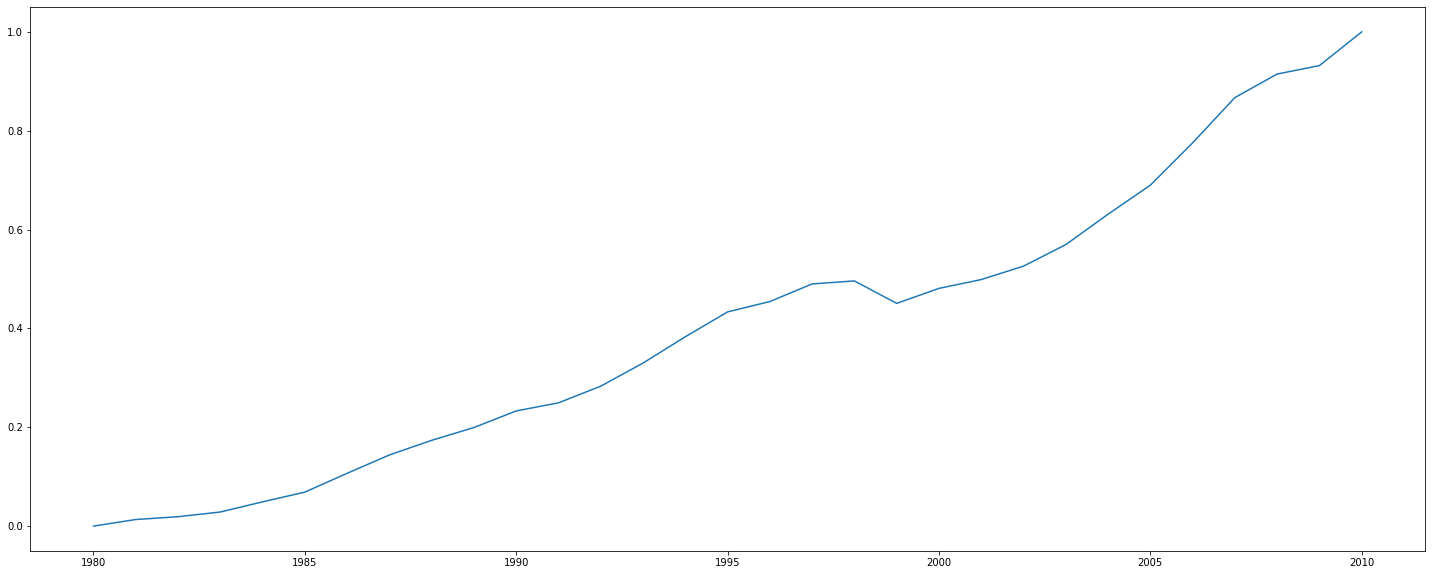

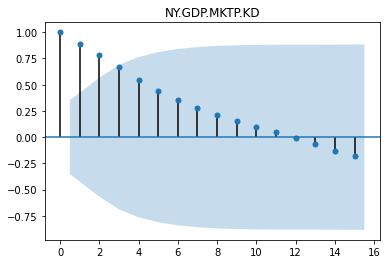

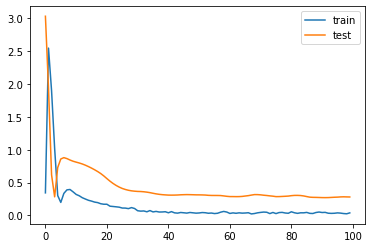

Train RMSE: 0.027
Test RMSE: 0.302


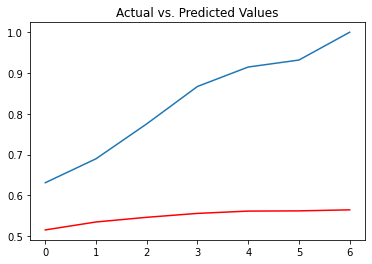

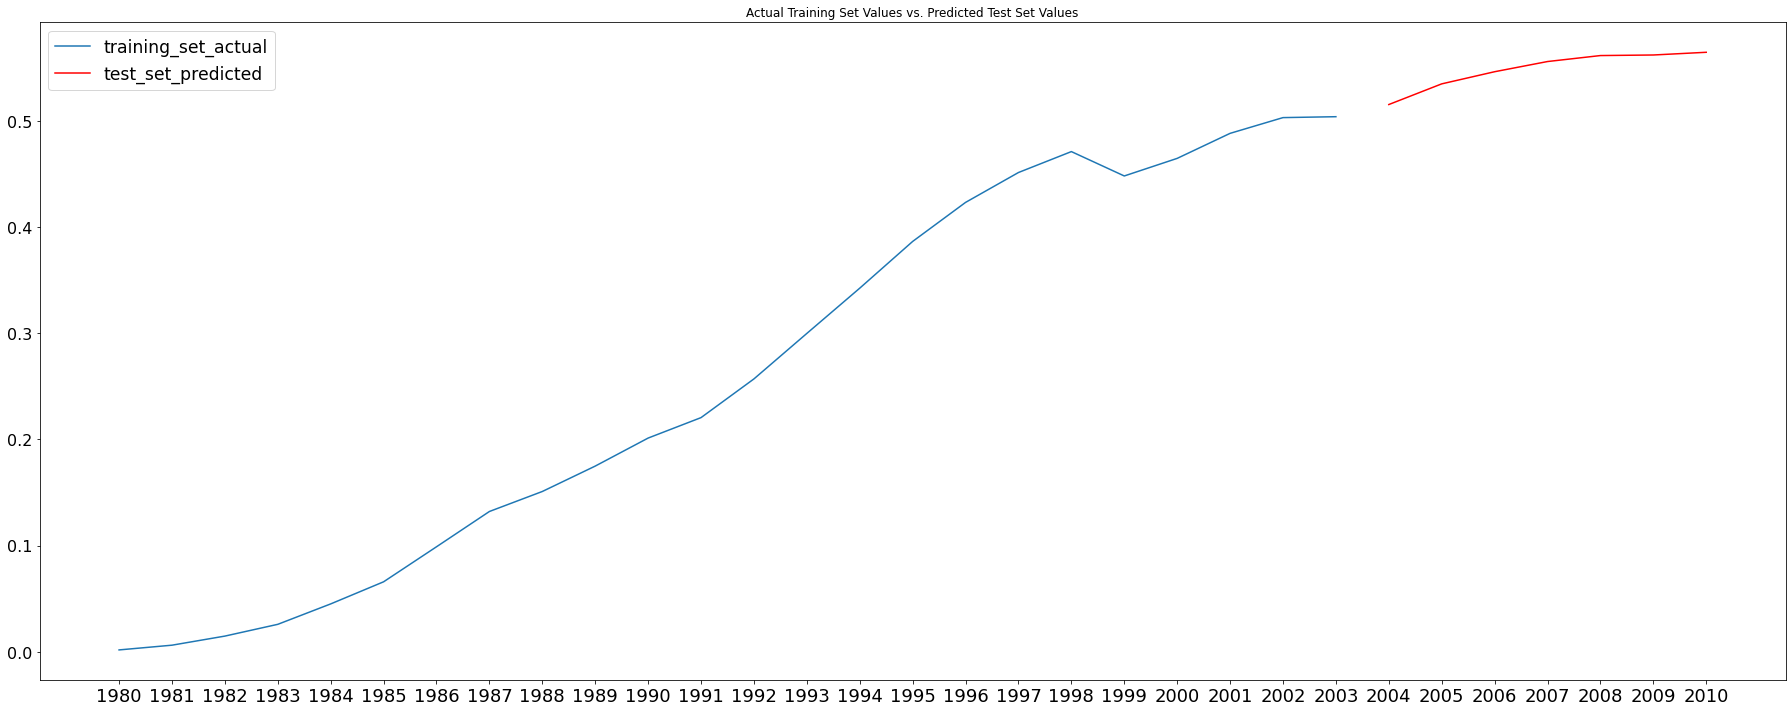

Predicted values: [0.5153659  0.53483862 0.54627669 0.55587274 0.56150091 0.56203747
 0.56458873]


In [23]:
# LSTM model
from models.LSTM import LSTM_predictions

predicted = LSTM_predictions("NY.GDP.MKTP.KD", norm_df, epochs=10)
print("Predicted values: " + str(predicted))

In [26]:
# Ridge Regression model
from models.RidgeRegression import ridge_regression

predicted, actual, similarity = ridge_regression(df)
print("Predicted values: " + str(predicted))
print("Actual values: " + str(actual))
print("Similarity %: " + str(similarity))

Predicted values: [0.35178827 0.37391094 0.441446   0.46283999 0.44172489 0.4914217 ]
Actual values: [0.44326673 0.50646487 0.68249121 0.82471268 0.78604534 1.        ]
Similarity %: 36.778128538615775


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1768: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 0
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, but rank is 0
  'rank is %d' 

Predicted values: 2005    0.116991
2006    0.105701
2007    0.092863
2008    0.059728
2009    0.035877
2010    0.098459
dtype: float64
Actual values: 2005    0.113008
2006    0.087849
2007    0.063827
2008    0.040824
2009    0.019439
2010    0.000000
Name: SH.DTH.MORT, dtype: float64


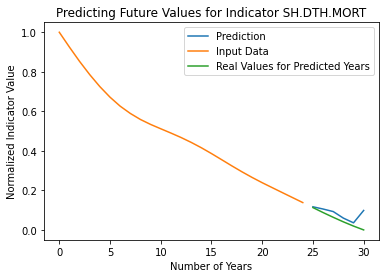

In [34]:
# Variance Auto Regression model
from models.VarianceAutoRegression import forecast_VAR

predicted, actual = forecast_VAR(df, 'SH.DTH.MORT')
print("Predicted values: " + str(predicted))
print("Actual values: " + str(actual))